# Marvel Comics
# Emilio and Saffian


### Importing libraries

In [ ]:
import pandas as pd    # for reading and manipulating tabular data
import networkx as nx  # for constructing and studying networks
import numpy as np     # for arrays
#import community           # for community structure later
import collections          # for manipulation tuples and zipping objects
import statistics as stats  # for generating summary statistics
import time                 # for measuring computating time
from matplotlib import pyplot as plt  # for outputting nice plots
import seaborn as sns                 # for creating even nicer plots
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout

In [ ]:
nodes1 = pd.read_csv('nodes.csv')
heros1= pd.read_csv('hero-network.csv')
edges1 = pd.read_csv('edges.csv')

### Data perparation

In [ ]:
# Null value check
print('Edges', edges1.shape)
print(edges1.isnull().sum())

print('Nodes', nodes1.shape)
print(nodes1.isnull().sum())

print('Heros', heros1.shape)
print(heros1.isnull().sum())

Edges (96104, 2)
hero     0
comic    0
dtype: int64
Nodes (19090, 2)
node    0
type    0
dtype: int64
Heros (574467, 2)
hero1    0
hero2    0
dtype: int64


In [ ]:
# Representative values check
print(edges1.describe())

                           hero  comic
count                     96104  96104
unique                     6439  12651
top     SPIDER-MAN/PETER PARKER  COC 1
freq                       1577    111


In [ ]:
print(nodes1.describe())


           node   type
count     19090  19090
unique    19090      2
top     2001 10  comic
freq          1  12651


In [ ]:
print(heros1.describe())

                  hero1            hero2
count            574467           574467
unique             6211             6173
top     CAPTAIN AMERICA  CAPTAIN AMERICA
freq               8149             8350


### Most common

In [ ]:
from itertools import combinations
topn = 25
topn_hero = edges1.groupby(['hero'])[['comic']].count().sort_values(by=['comic'], ascending=False).head(topn).index

h1_ = []; h2_ = []; cnt_ = [];
for comb in list(combinations(topn_hero, 2)):    
    temp1 = set(edges1[edges1['hero']==comb[0]]['comic'])
    temp2 = set(edges1[edges1['hero']==comb[1]]['comic'])
    cnt = len(temp1.intersection(temp2)) # Appear Together    
    h1_.append(comb[0]); h2_.append(comb[1]); cnt_.append(cnt);
appto_df = pd.DataFrame({'H1':h1_, 'H2':h2_, 'CNT':cnt_})
appto_df.head()

,H1,H2,CNT
0,SPIDER-MAN/PETER PARKER,CAPTAIN AMERICA,145
1,SPIDER-MAN/PETER PARKER,IRON MAN/TONY STARK,95
2,SPIDER-MAN/PETER PARKER,THING/BENJAMIN J. GR,125
3,SPIDER-MAN/PETER PARKER,THOR/DR. DONALD BLAK,96
4,SPIDER-MAN/PETER PARKER,HUMAN TORCH/JOHNNY S,147


In [ ]:
topn = 10
topn_comics = edges1.groupby(['comic'])[['hero']].count().sort_values(by=['hero'], ascending=False).head(topn)
topn_comics

,hero
comic,
COC 1,111
IW 3,91
IW 1,90
H2 279,87
IW 4,80
IW 2,76
MAXSEC 3,72
FF 370,62
IW 6,60


In [ ]:
topn = 10
topn_comics = edges1.groupby(['hero'])[['comic']].count().sort_values(by=['comic'], ascending=False).head(topn)
topn_comics

,comic
hero,
SPIDER-MAN/PETER PARKER,1577
CAPTAIN AMERICA,1334
IRON MAN/TONY STARK,1150
THING/BENJAMIN J. GR,963
THOR/DR. DONALD BLAK,956
HUMAN TORCH/JOHNNY S,886
MR. FANTASTIC/REED R,854
HULK/DR. ROBERT BRUC,835
WOLVERINE/LOGAN,819


### Preprocessing

In [ ]:
df_comics = nodes1[nodes1["type"]=="comic"].reset_index(drop=True)
name = ["C%.2d" % i for i in range(len(df_comics))]
df_comics["names"] = name
df_comics.rename(columns={"node": "comic"}, inplace=True)
df_comics

,comic,type,names
0,2001 10,comic,C00
1,2001 8,comic,C01
2,2001 9,comic,C02
3,A '00,comic,C03
4,A '01,comic,C04
...,...,...,...
12646,YOUNG MEN 24,comic,C12646
12647,YOUNG MEN 25,comic,C12647
12648,YOUNG MEN 26,comic,C12648
12649,YOUNG MEN 27,comic,C12649


In [ ]:
df_heros = nodes1[nodes1["type"]=="hero"].reset_index(drop=True)
name = ["H%.2d" % i for i in range(len(df_heros))]
df_heros["names"] = name
df_heros.rename(columns={"node": "hero"}, inplace=True)
df_heros

,hero,type,names
0,24-HOUR MAN/EMMANUEL,hero,H00
1,3-D MAN/CHARLES CHAN,hero,H01
2,4-D MAN/MERCURIO,hero,H02
3,8-BALL/,hero,H03
4,"ABBOTT, JACK",hero,H04
...,...,...,...
6434,"ZOTA, CARLO",hero,H6434
6435,ZOTA,hero,H6435
6436,ZURAS,hero,H6436
6437,ZURI,hero,H6437


In [ ]:
df1_ = nodes1[nodes1['type']=="comic"]
df2_ = nodes1[nodes1['type']=="hero"]
df1_['node'] = df1_['node'].map(df_comics.set_index('comic')['names'])
df2_['node'] = df2_['node'].map(df_heros.set_index('hero')['names'])
nodes = pd.concat([df1_, df2_])
nodes.sort_index(axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,node,type
0,C00,comic
1,C01,comic
2,C02,comic
3,H00,hero
4,H01,hero
...,...,...
19085,H6434,hero
19086,H6435,hero
19087,H6436,hero
19088,H6437,hero


In [ ]:
edges1['comic'] = edges1['comic'].map(df_comics.set_index('comic')['names'])
edges1['hero'] = edges1['hero'].map(df_heros.set_index('hero')['names'])
edges1

,hero,comic
0,H00,C509
1,H01,C1387
2,H01,C1388
3,H01,C2409
4,H01,C4744
...,...,...
96099,H6438,C4818
96100,H6438,C4819
96101,H6438,C6441
96102,H6438,C8037


In [ ]:
heros1['hero1'] = heros1['hero1'].map(df_heros.set_index('hero')['names'])
heros1['hero2'] = heros1['hero2'].map(df_heros.set_index('hero')['names'])

### Bipartie 

In [ ]:
edges_ = edges1.reindex(columns=["comic","hero"])#[2:11]
edges_

,comic,hero
0,C509,H00
1,C1387,H01
2,C1388,H01
3,C2409,H01
4,C4744,H01
...,...,...
96099,C4818,H6438
96100,C4819,H6438
96101,C6441,H6438
96102,C8037,H6438


In [ ]:
part0 = edges_['comic'].unique()
part0

array(['C509', 'C1387', 'C1388', ..., 'C10777', 'C10778', 'C11756'],
      dtype=object)

In [ ]:
part1 = edges_['hero'].unique()
part1

array(['H00', 'H01', 'H02', ..., 'H6436', 'H6437', 'H6438'], dtype=object)

In [ ]:
joins = list(edges_.to_records(index=False))
#joins

In [ ]:
BI = nx.Graph()
BI.add_nodes_from(part0, bipartite=0)
BI.add_nodes_from(part1, bipartite=1)
BI.add_edges_from(joins)

In [ ]:
print(nx.info(BI))

Graph with 19090 nodes and 96104 edges


In [ ]:
for component in list(nx.connected_components(BI)):
    if len(component)<18:
        for node in component:
            BI.remove_node(node)

In [ ]:
print(nx.info(BI))

Graph with 19029 nodes and 96059 edges


In [ ]:
C, H = bipartite.sets(BI)

KeyboardInterrupt: ignored

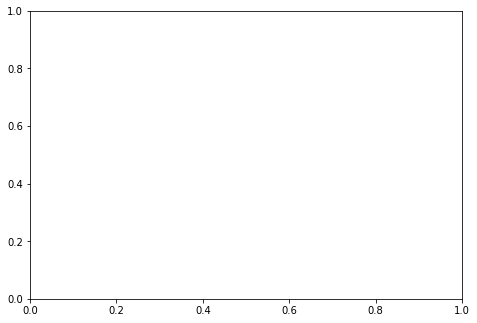

In [ ]:
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(C) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(H) ) # put nodes from Y at x=2
nx.draw(BI, with_labels=False,node_size= 1)
plt.show()

In [ ]:
df_heros[df_heros["hero"].apply(lambda x: "PARKER" in x)]

,hero,type,names
2495,"HOLDSWORTH, PARKER",hero,H2495
4140,"PARKER, BEN",hero,H4140
4141,"PARKER, HORACE",hero,H4141
4142,"PARKER, MARY",hero,H4142
4143,"PARKER, MARY (ROBOT)",hero,H4143
4144,"PARKER, MAY",hero,H4144
4145,"PARKER, MAY II",hero,H4145
4146,"PARKER, MAY III",hero,H4146
4147,"PARKER, MAY | TIMESL",hero,H4147
4148,"PARKER, PETER | TIME",hero,H4148


In [ ]:
df_heros.loc[df_heros['hero'] == '**SPIDER-MAN**']

,hero,type,names


In [ ]:
df_heros[df_heros['hero'].str.match('SPIDER')]

,hero,type,names
5296,SPIDERCIDE,hero,H5296
5297,SPIDER-MAN CLONE/BEN,hero,H5297
5298,SPIDER-MAN III/MARTH,hero,H5298
5299,SPIDER-MAN/PETER PARKERKER,hero,H5299
5300,SPIDER-WOMAN DOPPELG,hero,H5300
5301,SPIDER-WOMAN II/JULI,hero,H5301
5302,SPIDER-WOMAN IV/CHAR,hero,H5302
5303,SPIDER-WOMAN/JESSICA,hero,H5303


In [ ]:
#['COC 1','IW 3','IW 1','H2 279','IW 4']
df_comics.loc[df_comics['comic'] == 'IW 4']

,comic,type,names
5710,IW 4,comic,C5710


In [ ]:
aux_C = ['C2409', 'C5709', 'C5707', 'C4773', 'C5710']
aux_H = ['H857', 'H5299', 'H2654', 'H5703', 'H5722']
aux_join = []
aux_dict = {}
for i in joins:
  if i[0] in aux_C and i[1] in aux_H:
    aux_join.append(i)
for i in aux_C:
  aux_dict[i] = df_comics[df_comics["names"] == i]["comic"].values[0]
for i in aux_H:
  aux_dict[i] = df_heros[df_heros["names"] == i]["hero"].values[0]
aux_dict

{'C2409': 'COC 1',
 'C5709': 'IW 3',
 'C5707': 'IW 1',
 'C4773': 'H2 279',
 'C5710': 'IW 4',
 'H857': 'CAPTAIN AMERICA',
 'H5299': 'SPIDER-MAN/PETER PARKERKER',
 'H2654': 'IRON MAN/TONY STARK',
 'H5703': 'THING/BENJAMIN J. GR',
 'H5722': 'THOR/DR. DONALD BLAK'}

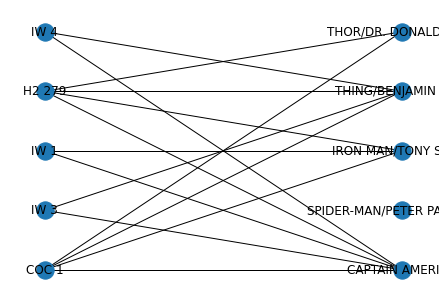

In [ ]:
BI = nx.Graph()
BI.add_nodes_from(aux_C, bipartite=0)
BI.add_nodes_from(aux_H, bipartite=1)
BI.add_edges_from(aux_join)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(aux_C) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(aux_H) ) # put nodes from Y at x=2
nx.draw(BI, pos=pos, with_labels=True, labels=aux_dict)
plt.show()

### Unipartie graphs

In [1]:
GC = bipartite.projected_graph(BI, C, multigraph=False)
print(nx.info(GC))


NameError: ignored

In [ ]:
GH = bipartite.projected_graph(BI, H, multigraph=False)
print(nx.info(GH))

In [ ]:
# Create graph from edge list stored in data file
G = nx.from_pandas_edgelist(heros, "hero1", "hero2") # Do not forget to specify node information type
print(nx.info(G))

In [ ]:
# Visualization COMICS

t = time.time()
spring_pos = nx.spring_layout(GC) # might take a little while
elapsed = time.time() - t
print('Time elapsed to get the graph layout: ', elapsed)
fig = plt.figure(figsize = (40, 20))
ax = fig.add_subplot(111)
ax.axis('off')

node_size_default = 40

n = nx.draw_networkx(GC, 
                     spring_pos,
                     ax = ax,
                     node_size = node_size_default,
                     with_labels = False)
plt.title("Entire graph - Default node size")
plt.close();

fig

### Unipartie graph

In [ ]:
# Full bipartite graph

# Separate comic and hero nodes
comic_node = nodes1['node'][nodes1['type'] == 'comic'].unique()
hero_node = nodes1['node'][nodes1['type'] == 'hero'].unique()

# Make the edge data as a 2-tuple
edges_tuple = edges1.values.tolist()
edges_tuple = [tuple(x) for x in edges_tuple]

# Make numpy array to list
comic_node_list = comic_node.tolist()
hero_node_list = hero_node.tolist()

# Make a blank graph
bipart = nx.Graph()

# Add nodes
bipart.add_nodes_from(comic_node_list, bipartite=0)
bipart.add_nodes_from(hero_node_list, bipartite=1)
bipart.add_node("SPIDER-MAN/PETER PARKER", bipartite=1) # Manually added a node that was somehow not included 

# Add edges
bipart.add_edges_from(edges_tuple)

In [ ]:
# Build a unipartite graph of hero
hero_graph = bipartite.projected_graph(bipart, hero_node_list, multigraph=False)

# Visualization
#plt.figure(figsize=(5, 5))
#pos=nx.spring_layout(hero_graph)
#nx.draw(hero_graph, pos=pos, node_size=5, node_color='tomato', alpha=0.4)
#nx.draw_networkx_edges(hero_graph, pos=pos, alpha=0.1)
#plt.show()

In [ ]:
# Build a unipartite graph of comic
comic_graph = bipartite.projected_graph(bipart, comic_node_list, multigraph=False)

# Visualization
#plt.figure(figsize=(5, 5))
#pos=nx.spring_layout(comic_graph)
#nx.draw(comic_graph, pos=pos, node_size=5, node_color='cornflowerblue', alpha=0.4)
#nx.draw_networkx_edges(comic_graph, pos=pos, alpha=0.1)
#plt.show()

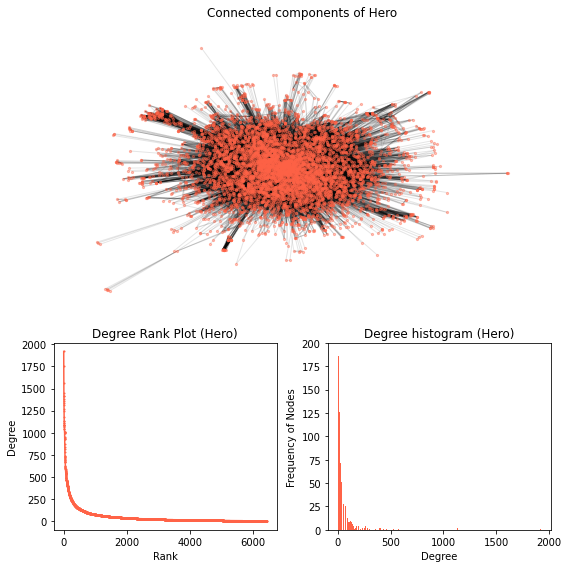

In [ ]:
# Distribution of degrees: Hero

# Ranking of nodes regarding the number of degrees
degree_sequence = sorted([d for n, d in hero_graph.degree()], reverse=True)

# Extract connected nodes to visualize
Gcc = hero_graph.subgraph(sorted(nx.connected_components(hero_graph), key=len, reverse=True)[0])

# Visualization
fig = plt.figure("Degree of the hero graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=5, alpha=0.4, node_color='tomato')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of Hero")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, marker="o", markersize=1, color='tomato')
ax1.set_title("Degree Rank Plot (Hero)")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True), color='tomato')
ax2.set_title("Degree histogram (Hero)")
ax2.set_xlabel("Degree")
ax2.set_ylim([0, 200])
ax2.set_ylabel("Frequency of Nodes")

fig.tight_layout()
plt.show()

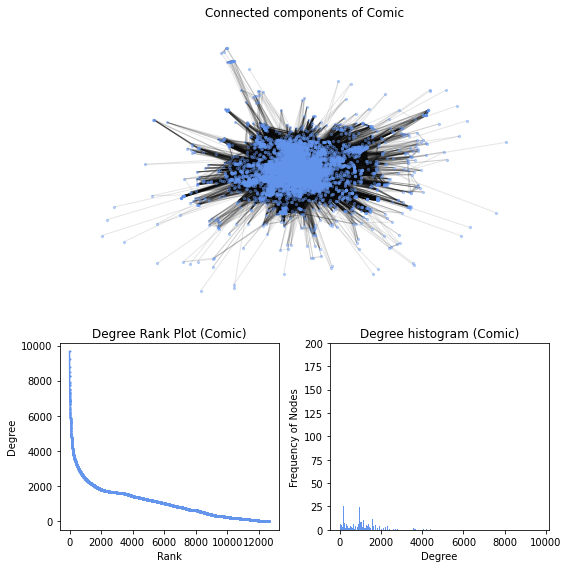

In [ ]:
# Distribution of degrees: Comic

# Ranking of nodes regarding the number of degrees
degree_sequence = sorted([d for n, d in comic_graph.degree()], reverse=True)

# Extract connected nodes to visualize
Gcc = comic_graph.subgraph(sorted(nx.connected_components(comic_graph), key=len, reverse=True)[0])

# Visualization
fig = plt.figure("Degree of the comic graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=5, alpha=0.4, node_color='cornflowerblue')
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of Comic")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, marker="o", markersize=1, color='cornflowerblue')
ax1.set_title("Degree Rank Plot (Comic)")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True), color='cornflowerblue')
ax2.set_title("Degree histogram (Comic)")
ax2.set_xlabel("Degree")
ax2.set_ylim([0, 200])
ax2.set_ylabel("Frequency of Nodes")

fig.tight_layout()
plt.show()

### Example

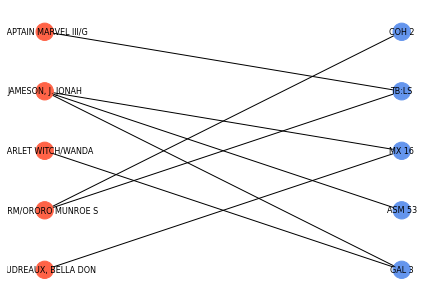

In [ ]:
# Mini sample
mini_comic_list = ['TB:LS', 'ASM 53', 'MX 16', 'GAL 3', 'COH 2']
mini_hero_list = ['CAPTAIN MARVEL III/G', 'JAMESON, J. JONAH', 'BOUDREAUX, BELLA DON', 
                  'SCARLET WITCH/WANDA', 'STORM/ORORO MUNROE S']
mini_edges = [('CAPTAIN MARVEL III/G', 'TB:LS'),
              ('JAMESON, J. JONAH', 'ASM 53'),
              ('BOUDREAUX, BELLA DON', 'MX 16'),
              ('SCARLET WITCH/WANDA', 'GAL 3'),
              ('STORM/ORORO MUNROE S', 'COH 2'),
              ('JAMESON, J. JONAH', 'GAL 3'),
              ('STORM/ORORO MUNROE S', 'TB:LS'),
              ('JAMESON, J. JONAH', 'MX 16'),
             ]

# Make a blank graph
mini_bipart = nx.Graph()

# Add nodes
mini_bipart.add_nodes_from(mini_comic_list, bipartite=0)
mini_bipart.add_nodes_from(mini_hero_list, bipartite=1)

# Add edges
mini_bipart.add_edges_from(mini_edges)

# Separate nodes
mini_top_nodes = {n for n, d in mini_bipart.nodes(data=True) if d['bipartite'] == 0}
mini_bottom_nodes = set(mini_bipart) - mini_top_nodes
mini_bipart.nodes(data=True)

# Set node colors
color_dict = {0:'cornflowerblue', 1:'tomato'}
color_list = [color_dict[i[1]] for i in mini_bipart.nodes.data('bipartite')]

# Draw a bipartite graph
pos = dict()
color = []
pos.update((n, (1, i)) for i, n in enumerate(mini_bottom_nodes) ) 
pos.update((n, (2, i)) for i, n in enumerate(mini_top_nodes) ) 
nx.draw(mini_bipart, pos=pos, with_labels=True, node_color=color_list, font_size=8)
plt.show()

### Measure

In [ ]:
heros_ = nx.from_pandas_edgelist(heros1, source = "hero1", target = "hero2")
nx.info(heros)
#Degree Centrality 
MF = nx.degree_centrality(heros_)

counter = 0
for w in sorted(MF, key = MF.get , reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,'{:0.2f}'.format(MF[w]))

CAPTAIN AMERICA 0.30
SPIDER-MAN/PETER PAR 0.27
IRON MAN/TONY STARK  0.24
THING/BENJAMIN J. GR 0.22
MR. FANTASTIC/REED R 0.21
WOLVERINE/LOGAN  0.21
HUMAN TORCH/JOHNNY S 0.21
SCARLET WITCH/WANDA  0.21
THOR/DR. DONALD BLAK 0.20
BEAST/HENRY &HANK& P 0.20


In [ ]:
#EigenVector
EV = nx.eigenvector_centrality(heros_)
counter = 0
for w in sorted(EV, key =EV.get,  reverse = True):
    counter = counter + 1
    if counter == 11:
        break
    print(w,"{:0.4f}".format(EV[w]))

CAPTAIN AMERICA 0.1168
IRON MAN/TONY STARK  0.1025
SCARLET WITCH/WANDA  0.1008
THING/BENJAMIN J. GR 0.1008
SPIDER-MAN/PETER PAR 0.1002
MR. FANTASTIC/REED R 0.0997
VISION  0.0985
HUMAN TORCH/JOHNNY S 0.0985
WOLVERINE/LOGAN  0.0984
BEAST/HENRY &HANK& P 0.0955


In [ ]:
# Digree Centrality
centrality_hero = nx.degree_centrality(hero_graph)
centrality_df_hero = pd.DataFrame(sorted(centrality_hero.items(), key=lambda x:x[1], reverse=True), columns=['Hero', 'Degree Centrality'])
centrality_df_hero['Degree Centrality'] = centrality_df_hero['Degree Centrality'].apply(lambda x: round(x, 2))
print(centrality_df_hero.head())

centrality_comic = nx.degree_centrality(comic_graph)
centrality_df_comic = pd.DataFrame(sorted(centrality_comic.items(), key=lambda x:x[1], reverse=True), columns=['Comic', 'Degree Centrality'])
centrality_df_comic['Degree Centrality'] = centrality_df_comic['Degree Centrality'].apply(lambda x: round(x, 2))
print(centrality_df_comic.head())

### Communities

In [ ]:
from community import community_louvain
import matplotlib.cm as cm

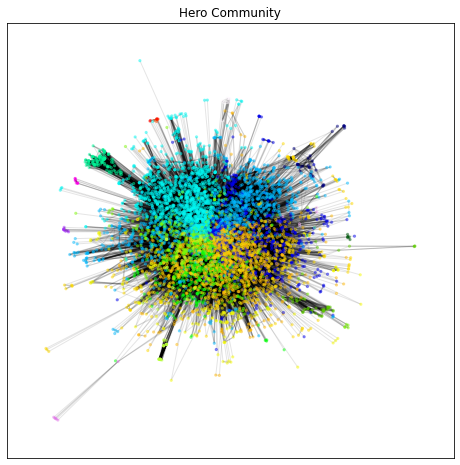

In [ ]:
# Visualization of communities divided by Louvain algorithm: Hero

# Extract connected nodes to visualize
Gcc = hero_graph.subgraph(sorted(nx.connected_components(hero_graph), key=len, reverse=True)[0])

# Community division
partition_hero = community_louvain.best_partition(Gcc)

# Color the nodes according to community
cmap = cm.get_cmap('gist_ncar', max(partition_hero.values()) + 1)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, partition_hero.keys(), node_size=5, alpha=0.4,
                       cmap=cmap, node_color=list(partition_hero.values()))
nx.draw_networkx_edges(Gcc, pos, alpha=0.1)
plt.title("Hero Community")
plt.show()

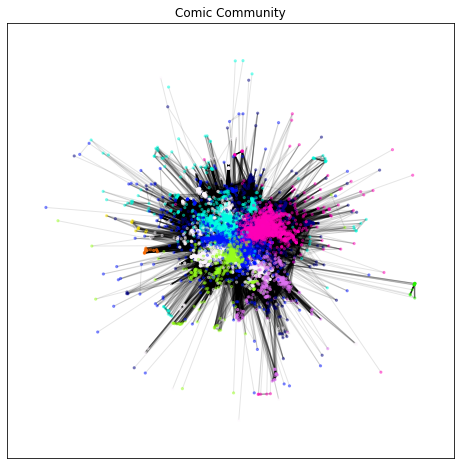

In [ ]:
# Visualization of communities divided by Louvain algorithm: Comic

# Extract connected nodes to visualize
Gcc = comic_graph.subgraph(sorted(nx.connected_components(comic_graph), key=len, reverse=True)[0])

# Community division
partition_comic = community_louvain.best_partition(Gcc)

# Color the nodes according to community
cmap = cm.get_cmap('gist_ncar', max(partition_comic.values()) + 1)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(Gcc, seed=42)
nx.draw_networkx_nodes(Gcc, pos, partition_comic.keys(), node_size=5, alpha=0.4,
                       cmap=cmap, node_color=list(partition_comic.values()))
nx.draw_networkx_edges(Gcc, pos, alpha=0.1)
plt.title("Comic Community")
plt.show()

In [ ]:
# Modularity (Evaluate the community dividion)
import networkx.algorithms.community as nx_comm

hero_modu = nx_comm.modularity(hero_graph, nx_comm.label_propagation_communities(hero_graph))
comic_modu = nx_comm.modularity(comic_graph, nx_comm.label_propagation_communities(comic_graph))

print('Modularity of Hero network: ', round(hero_modu, 4))
print('Modularity of Comic network: ', round(comic_modu, 4))

Modularity of Hero network:  0.0553
Modularity of Comic network:  0.0032


In [ ]:
# Analyze community info
Gcc_hero = hero_graph.subgraph(sorted(nx.connected_components(hero_graph), key=len, reverse=True)[0])
partition_hero = community_louvain.best_partition(Gcc_hero)

Gcc_comic = comic_graph.subgraph(sorted(nx.connected_components(comic_graph), key=len, reverse=True)[0])
partition_comic = community_louvain.best_partition(Gcc_comic)

partition_hero_df = pd.DataFrame(partition_hero.values(), index=partition_hero.keys(), columns=['Community'])
partition_comic_df = pd.DataFrame(partition_comic.values(), index=partition_comic.keys(), columns=['Community'])

In [ ]:
# Number of communities
print('Number of communities (Hero): ', partition_hero_df['Community'].nunique())
print('Number of communities (Comic): ', partition_comic_df['Community'].nunique())

Number of communities (Hero):  23
Number of communities (Comic):  9


In [ ]:
# Top communities having larger members
community_rank_hero = pd.DataFrame(partition_hero_df.value_counts(), columns=['Count'])
print('TOP communities (Hero): ', community_rank_hero.head(3))

community_rank_comic = pd.DataFrame(partition_comic_df.value_counts(), columns=['Count'])
print('TOP communities (Comic): ', community_rank_comic.head(3))

TOP communities (Hero):             Count
Community       
11          1390
17           998
1            858
TOP communities (Comic):             Count
Community       
1           3426
4           3077
0           1967
